In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Size, target SDK version, and minimum SDK version

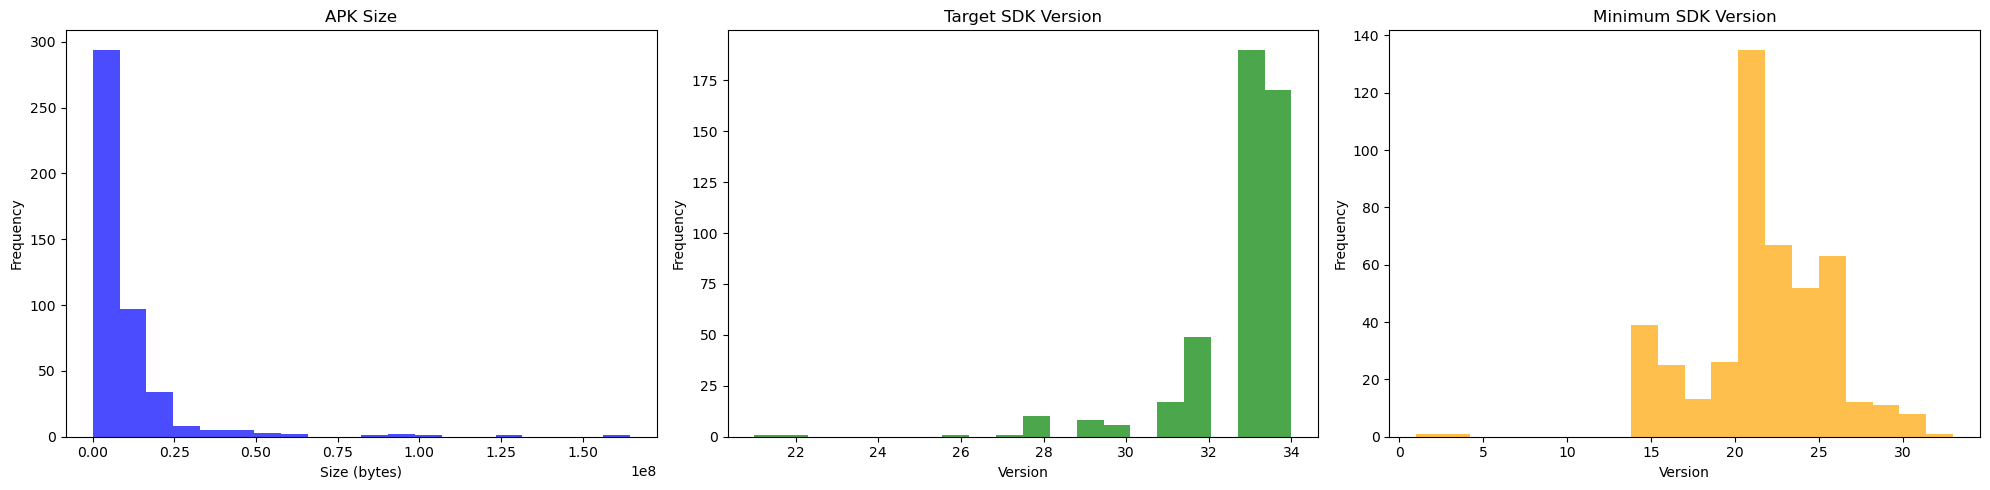

In [42]:
# Read the CSV file into a DataFrame
df = pd.read_csv('./features.csv')

# Plot size
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.hist(df['size'], bins=20, color='blue', alpha=0.7)
plt.title('APK Size')
plt.xlabel('Size (bytes)')
plt.ylabel('Frequency')


# Plot target SDK version
plt.subplot(1, 3, 2)
plt.hist(df['target_sdk_version'], bins=20, color='green', alpha=0.7)
plt.title('Target SDK Version')
plt.xlabel('Version')
plt.ylabel('Frequency')

# Plot minimum SDK version
plt.subplot(1, 3, 3)
plt.hist(df['min_sdk_version'], bins=20, color='orange', alpha=0.7)
plt.title('Minimum SDK Version')
plt.xlabel('Version')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Compilation time of compiled APKs

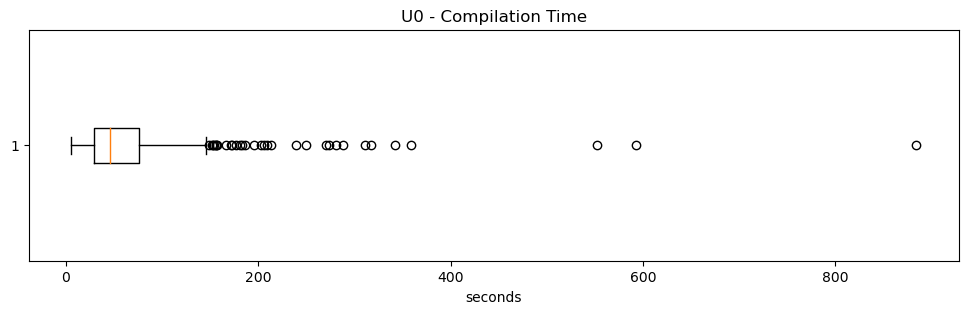

In [38]:
df = pd.read_csv('../crawler/apks.csv', index_col='hash')

df_filtered = df.dropna(subset=['compilation_time'])

# Plot the boxplot without NaN values
plt.figure(figsize=(12, 3))
plt.boxplot(df_filtered['compilation_time'], vert=False)
plt.xlabel('seconds')
plt.title('U0 - Compilation Time')
plt.show()

## Languages and minification

In [39]:
print('\nTotal =',len(df))
print('# Language')
print('### groovy =', len(df[df.language == 'groovy']))
print('### kotlin =', len(df[df.language == 'kotlin']))
print('### unknown =', len(df[df.language == 'unknown']))
print('# Obfuscation')
print('### true', len(df[df.is_minified == 'True']))
print('### false', len(df[df.is_minified == 'False']))
print('### unknown =', len(df[df.is_minified == 'unknown']))

df_compiled = df[df.compiled == True]
print('\nCompiled =', len(df_compiled))
print('# Language')
print('### groovy =', len(df_compiled[df_compiled.language == 'groovy']))
print('### kotlin =', len(df_compiled[df_compiled.language == 'kotlin']))
print('### unknown =', len(df_compiled[df_compiled.language == 'unknown']))
print('# Obfuscation')
print('### true =', len(df_compiled[df_compiled.is_minified == 'True']))
print('### false =', len(df_compiled[df_compiled.is_minified == 'False']))
print('### unknown =', len(df_compiled[df_compiled.is_minified == 'unknown']))

df_non_compiled = df[df.compiled == False]
print('\nNon compiled =', len(df_non_compiled))
print('# Language')
print('### groovy =', len(df_non_compiled[df_non_compiled.language == 'groovy']))
print('### kotlin =', len(df_non_compiled[df_non_compiled.language == 'kotlin']))
print('### unknown =', len(df_non_compiled[df_non_compiled.language == 'unknown']))
print('# Obfuscation')
print('### true =', len(df_non_compiled[df_non_compiled.is_minified == 'True']))
print('### false =', len(df_non_compiled[df_non_compiled.is_minified == 'False']))
print('### unknown =', len(df_non_compiled[df_non_compiled.is_minified == 'unknown']))


Total = 4172
# Language
### groovy = 1679
### kotlin = 256
### unknown = 2237
# Obfuscation
### true 811
### false 1124
### unknown = 2237

Compiled = 478
# Language
### groovy = 385
### kotlin = 93
### unknown = 0
# Obfuscation
### true = 142
### false = 336
### unknown = 0

Non compiled = 3694
# Language
### groovy = 1294
### kotlin = 163
### unknown = 2237
# Obfuscation
### true = 669
### false = 788
### unknown = 2237


## Permissions

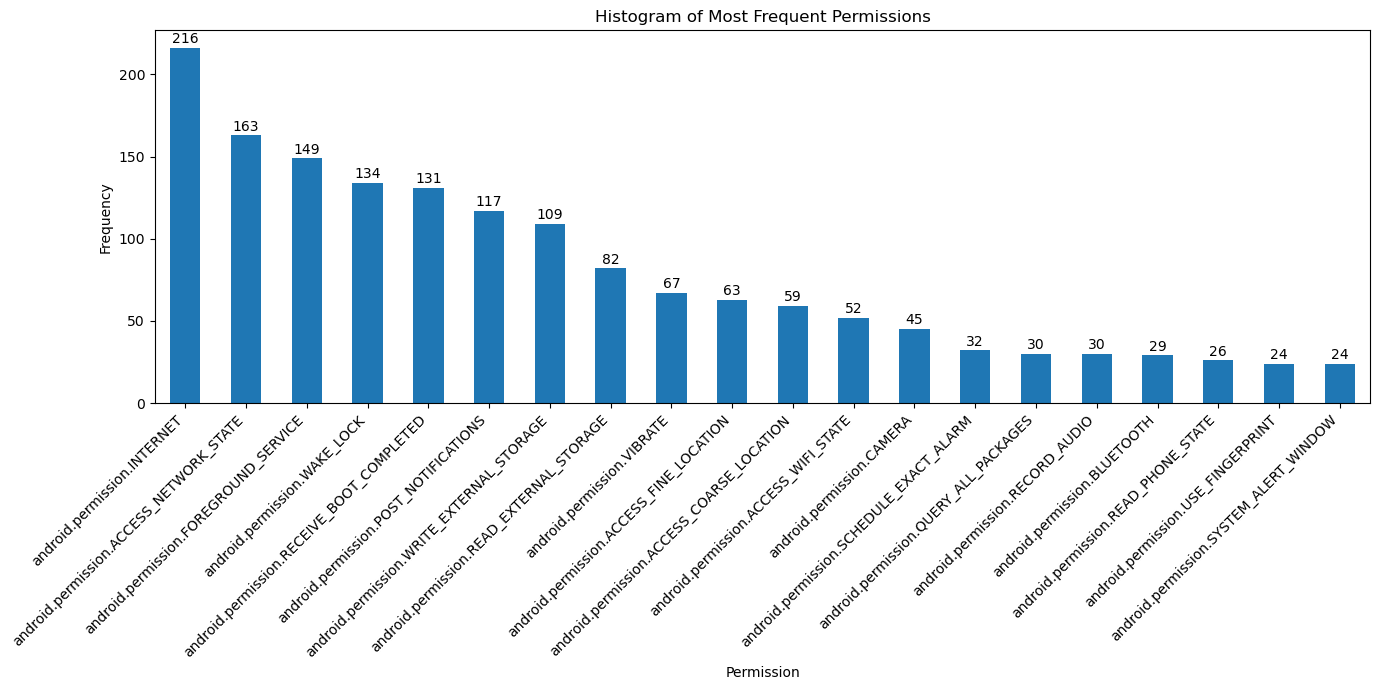

In [41]:
import matplotlib.pyplot as plt

df = pd.read_csv('./features.csv', index_col='hash')

# Split permissions by delimiter ';'
permissions_split = df['permissions'].str.split(';')

# Flatten the list of permissions
permissions_flat = [permission for sublist in permissions_split.dropna() for permission in sublist]

# Count the frequency of each permission
permission_counts = pd.Series(permissions_flat).value_counts()
filtered_permissions = permission_counts.head(20)

# Plot the histogram
plt.figure(figsize=(14, 7))
bars = filtered_permissions.plot(kind='bar')
plt.title('Histogram of Most Frequent Permissions')
plt.xlabel('Permission')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its frequency
for i, value in enumerate(filtered_permissions):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()
